# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
#from sklearn.cross_validation import ShuffleSplit
# try to import and use the new model that deprecates cross_validation
from sklearn.model_selection import ShuffleSplit 
# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)
print "results Size {} ".format(*prices.shape)


# X is features, y is prices

C:\Users\Petros\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Petros\Anaconda2\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.
results Size 489 


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
#print prices[485:]
#print prices[prices.shape[0]-5:prices.shape[0]]
#Use numpy for all as prices is already a vector
#print np.min(prices[485:])
#minimum_price = np.min(prices)
#minimum_price = np.amin(prices, axis=0)
minimum_price = np.amin(prices)

# TODO: Maximum price of the data
#print np.max(prices[485:])
#maximum_price = np.max(prices)
maximum_price = np.amax(prices)

# TODO: Mean price of the data
#print np.mean(prices[485:])
mean_price = np.mean(prices)

# TODO: Median price of the data
#print np.median(prices[485:])
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
#print np.std(prices[485:])
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: ** I would expect that:
- an increase in 'RM' would result to an increase in MEDV, as the possibility of the object to have a lot of rooms and therefore be more expensive increases. Also I would expect that wealthier areas usually have bigger houses. On the other end smaller houses could indicate a higher density area where usually real estate is more expensive, but still I believe that the previous reasons are a bit stronger.
- an increase in 'LSTAT' would result to a decrease in MEDV, as I would expect that the lower class owners cannot afford expensive houses and therefore the area home prices would be lower. 
- an increase on the 'PTRATIO' value would resut to a decrease in the home prices as a small Student to Teachers can be an indication of better education prospect, when more teachers are available for primary and secondary schools. A low ratio of students in a class can be attractive for families.   

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score 

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:** A coefficient of determination scoring .923 indicates that the target variable is highly (92.3%) predictable from the input variables. The samples of course are too few and the model seems to predict higher values in all cases.  

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import 'train_test_split'
#from sklearn.cross_validation import train_test_split
# try to import and use the new model that deprecates cross_validation
from sklearn.model_selection import train_test_split 

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=25)
#print y_test
# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: ** Spliting our data in a training and a testing subset, ensures that we will have data that have not been used during the training of the model to validate how good our model performs. As minimizing the errors that the model makes for the training data might not be the best criteria as the model (overfiting) works more as memorizing than predicting, we use the testing subset to validate our model and measure the prediction performance on untrained data.    

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

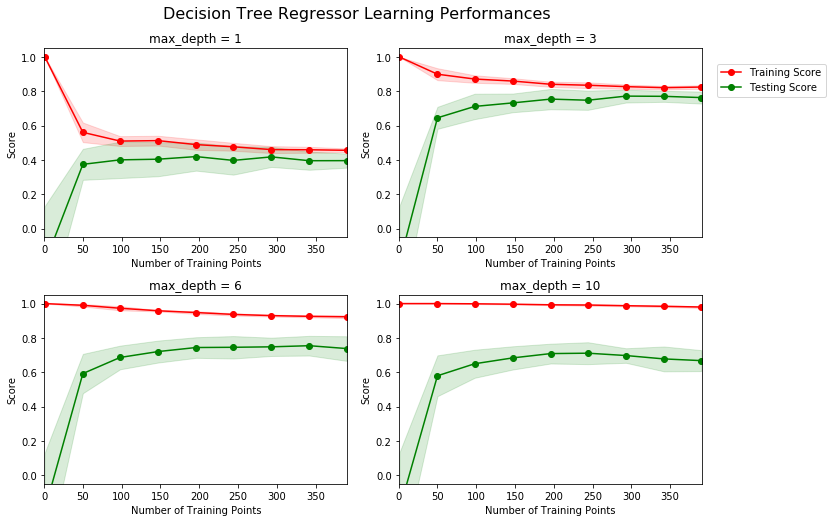

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
#vs.ModelLearning(X_train, y_train)
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: ** The curves in the regressor with max_depth=3 show that the training score and the testing score are converging to a number close to 0.8. I will choose this one as the ones with a bigger max_depth seem overfiting when judging on the test data. while one with max_depth=1 has very low Scores. 
For the chosen model with max_depth=3 that converges, as more training data points are added the model improves but it seems it reaches a good performance with 350 Training points and further training points do not have a significant improvement on the testing score. For the underfitting regressor again the same applies that it seems it reaches close to best performance already, while for the overfitting it would even result in worse performances.  

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

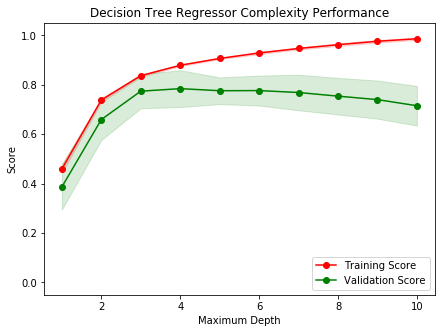

In [7]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: ** When the model is trained with a maximum depth of 1 it suffers from High Bias. We can see that both the training score and the validation score is low. While the model with maximum depth of 10 from high variance as it performs very well on the training data as if it is memorizing but having worse performance on the validation data (not too much though) from the cases where the model is trained with smaller max decision depth. i.e. it does not perform too bad but worse than the one with max_depth 3 for example with the unecessary complexity that the decision depth adds in the model.     

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: ** It seems that the best maximum depth for the model that best generalizes new unseen data is 3. We see that depths 3 to 7 perform similarly on the validation score but the simplicity of a model with max depth 3 is what makes it significantly better than the other choices as deeper depths in the decision tree seem to at least not add value. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: ** My understanding is that the grid search is the technique where we put the performance result values (Eg. F1) of a model in a matrix where in each axis we have a model complexity parameter (even more useful when number of parameters>1), Eg. F1 values found by cross validation data for different parameter values on Kernel and C in SVM. Seeing which parameter values provide the best results for the validation data can help us tune the parameter combination, to avoide overfiting since it gives us the indication of the best combination of parameters and the simpler combination that performs well. Parameters depend on the model type and an example is the max depth on a decision tree algorithm or C and gama in a Support Vector Machine with a poly kernel.   

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: ** 
The goal of cross-validation of a trained model is to quantitatively represent the expected level of fit of the model using data that were not used for training.
With the k-fold cross-validation technique we split the data in k equal sized parts (in a random way preferably to avoid patterns on data). The model shall be trained and validated k times. Each of the parts (folds of data), become exactly one time the validation set when the rest k-1 folds are the training set. In the end we average the results from the k cross validation runs. 
The benefit comes from the fact that we utilize all the data as training sets and all data as validation sets. Running it multiple times with different sets of data for training and validation we avoid variation and possible biased data in the training or the validation set. It is especially helpful when data are small, but due to it's non exaustive nature it can be used for bigger sized data since it does not require excessive compute time (proportional to n).

As Cross-validation can also be used in variable selection (https://en.wikipedia.org/wiki/Cross-validation_(statistics)) in the case of a Grid search especially when we have a large number of features in our data, it can significantly help by identifying a subset of the features that are trully informative for the model, thus significantly simplifying the gridsearch matrix.  

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [8]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import f1_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
#import matplotlib.pyplot as plt

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    #cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}
    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    #print grid.best_score_
    #print grid.cv_results_['mean_test_score']
    #plt.scatter(range(1,11),grid.cv_results_['mean_test_score'])

    # Return the optimal model after fitting the data
    return grid.best_estimator_



### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])


Parameter 'max_depth' is 5 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: ** The optimum model's max_depth is 5 while in question 6 the answer max_depth was 3. From the previous graph and the CV Results of this grid we saw that the differences are small for max_depth valuess 3-6.   

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

In [62]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
    # Uncomment below for printing values of similar cases
    '''
    print "Cases similar to client {}".format(i+1)
    xx= data[
        data.RM>(client_data[i][0]-1)][
        data.RM<(client_data[i][0]+1)][
        data.LSTAT>(client_data[i][1]-3)][
        data.LSTAT<client_data[i][1]+3][
        data.PTRATIO>client_data[i][2]-4][#.query('PTRATIO<client_data[i][2]+4')
        data.PTRATIO<client_data[i][2]+4]
    print xx
    # Weird Number of rooms values on RM Eg. 5.889. What does this mean? I would expect it would be in the form 1, 1.5, 2, 2.5 etc. 
    # When it is an average of the neighborhood or something it still is strange since we have too many different values. 
    # ok found it... RM: average number of rooms per dwelling. Why is this a feature and not the number of rooms? 
    print xx.mean()
    '''
    

Predicted selling price for Client 1's home: $431,287.50
Predicted selling price for Client 2's home: $175,700.00
Predicted selling price for Client 3's home: $913,500.00


**Answer: ** 
Predicted selling price for Client 1's home with 5 rooms, 17% Poverty level in the neighborhood and Student teacher ratio 15-1 is : 431,287.50 Dollars. When we see homes with similar characteristics at the raw original data in the csv (see printouts by removing the comments) and judging only on the three parameters the price seems very reasonable.
Cases similar to client 1

        RM  LSTAT  PTRATIO      MEDV
    12   5.889  15.71     15.2  455700.0
    46   5.786  14.15     17.9  420000.0
    49   5.602  16.20     17.9  407400.0
    112  5.913  16.21     17.8  394800.0
    115  5.928  15.76     17.8  384300.0
    118  5.872  15.37     17.8  428400.0
    146  5.628  16.65     14.7  327600.0
    153  5.709  15.79     14.7  407400.0
    156  5.272  16.14     14.7  275100.0
    166  5.875  14.43     14.7  365400.0
    168  5.572  14.69     16.6  485100.0
    200  5.783  18.06     18.6  472500.0
    203  5.960  17.27     18.6  455700.0
    205  5.807  16.03     18.6  470400.0
    211  5.951  17.92     16.4  451500.0
    286  5.790  15.84     16.0  426300.0
    305  5.914  18.33     18.4  373800.0
    306  5.782  15.94     18.4  415800.0
    Means
    RM              5.779611
    LSTAT          16.138333
    PTRATIO        16.933333
    MEDV       412066.666667

Predicted selling price for Client 2's homewith 4 rooms, 32 percent Poverty level in the neighborhood and Student teacher ratio 22-1 is : 175,700.00 Dollars.  When we see homes with similar characteristics and judging only on the three parameters the price seems a bit lower than it could.  
Cases similar to client 2

         RM  LSTAT  PTRATIO      MEDV
    356  4.906  34.77     20.2  289800.0
    367  4.368  30.63     20.2  184800.0
    371  4.880  30.62     20.2  214200.0
    395  4.628  34.37     20.2  375900.0
    Means
    RM              4.6955
    LSTAT          32.5975
    PTRATIO        20.2000
    MEDV       266175.0000

Predicted selling price for Client 3's home with 8 rooms, 3 percent Poverty level in the neighborhood and Student teacher ratio 12-1 is : 913,500.00 Dollars. When we see homes with similar characteristics and judging only on the three parameters the price seems very reasonable.
    Cases similar to client 3
    
        RM  LSTAT  PTRATIO       MEDV    
    184  7.185   5.39     15.2   732900.0
    187  7.178   2.87     15.2   764400.0
    190  7.287   4.08     12.6   699300.0
    196  7.610   3.11     14.7   888300.0
    197  7.853   3.81     14.7  1018500.0
    248  7.454   3.11     15.9   924000.0
    253  8.398   5.91     13.0  1024800.0
    258  7.470   3.16     13.0   913500.0
    270  7.820   3.76     14.9   953400.0
    272  7.645   3.01     14.9   966000.0
    288  7.041   4.74     14.8   609000.0
    330  7.241   5.49     15.5   686700.0
    Means
    RM              7.515167
    LSTAT           4.036667
    PTRATIO        14.533333
    MEDV       848400.000000

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [49]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: ** I think that even if the prices seem realistic enough, the model should not be used in a real-world setting. For a real world setting the solution has to be more sophisticated with more individual house characteristic parameters taken into consideration, such as the year built, the building quality, the size is sqm2 and others that are very basic characteristics and make a big difference in the appartment price. One also very important reason is the outdated prices used for the calculation of the model. First there is no reason not to use actual data, then even if inflation is calculated it is not the only reason affecting the prices, so the prices could be tottally diferent in 2017. Even if the range in calculated prices is big i.e.~20% of the price, the output would still be valuable and could be used to calculate a range for the price or as an indicational value, so the big range would not be the problem. 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.